In [1]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
#from census import Census
from config import gkey

gmaps.configure(api_key=gkey)


{'whiskers': [<matplotlib.lines.Line2D at 0x246142bca00>,
 'caps': [<matplotlib.lines.Line2D at 0x246142d8100>,
 'boxes': [<matplotlib.lines.Line2D at 0x246142bc6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x246142d87c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x246142d8b20>],
 'means': []}

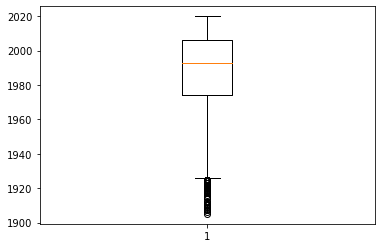

In [2]:
file = "../Resources/Austin Data Set CSV.csv"
base_df = pd.read_csv(file)

# pd.set_option("display.max_rows", 15)

base_df.homeType.value_counts()
yearBuilt = base_df['yearBuilt']
#price = base_df['lot']
plt.boxplot(yearBuilt)



In [4]:
mask = base_df.city == 'austin'
newDf = base_df[mask].reset_index()

mask = newDf.lotSizeSqFt != 1508482800.0
cleanDf = newDf[mask]
cleanDf.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,15019.000000,1.501900e+04,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,1.501900e+04,...,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000
mean,7645.484853,1.034826e+08,78736.921433,30.292187,-97.779470,1.994193,1.230441,1.225714,1988.347160,5.147095e+05,...,0.048805,1.035888,0.976896,1.840638,5.799901,1235.715361,14.866236,2.683431,3.439843,1.468274
std,4351.997721,3.169948e+08,15.841007,0.096616,0.083836,0.053351,1.351113,1.351738,21.569163,4.542934e+05,...,0.232988,0.264121,0.292056,1.064699,1.852850,326.527599,1.745192,1.055014,0.851327,0.524003
min,17.000000,2.858495e+07,78652.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,3888.500000,2.941047e+07,78727.000000,30.204472,-97.838570,1.980000,0.000000,0.000000,1974.000000,3.100000e+05,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,7655.000000,2.949329e+07,78739.000000,30.285294,-97.770065,1.980000,1.000000,1.000000,1993.000000,4.090000e+05,...,0.000000,1.000000,1.000000,1.566667,6.000000,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,11412.500000,7.033528e+07,78749.000000,30.366622,-97.719181,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,...,0.000000,1.000000,1.000000,2.266667,7.000000,1494.000000,16.000000,3.000000,4.000000,2.000000
max,15170.000000,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,...,2.000000,3.000000,2.000000,7.700000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [5]:
cleanDf.columns


Index(['index', 'zpid', 'city', 'streetAddress', 'zipcode', 'description',
       'latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [6]:
# renamed_df = cleanDf.rename(columns= {'latestPrice': 'Price'}, inplace=True)
# renamed_df.u


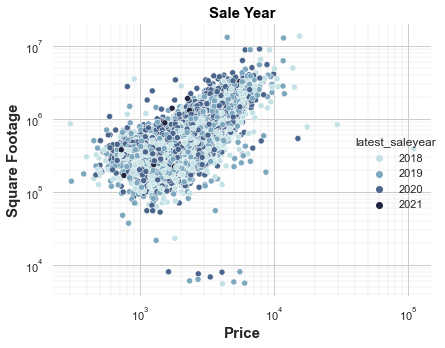

In [22]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=cleanDf,
    x="livingAreaSqFt", y="latestPrice",
    hue="latest_saleyear",
    palette=cmap, sizes=(5, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.set_xlabels("Price") 
g.set_ylabels("Square Footage") 
# g.set_titles('Price, SqFt, Bed/Bath')
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.title("Sale Year", fontweight="bold", fontsize=15, color="black", fontname="sans-serif")
plt.xlabel("Price", fontweight="bold", fontsize=15, fontname="sans-serif")
plt.ylabel("Square Footage", fontweight="bold", fontsize=15, fontname="sans-serif")
plt.tight_layout()
plt.savefig(r'Seaborn_scatter_v2.png', dpi = 100)

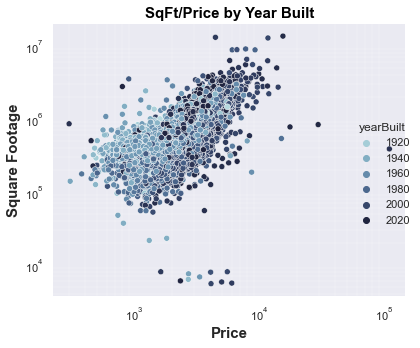

In [20]:
sns.set_theme(style="dark")

# Load the example planets dataset


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=cleanDf,
    x="livingAreaSqFt", y="latestPrice",
    hue="yearBuilt",
    palette=cmap, sizes=(5, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.set_xlabels("Price") 
g.set_ylabels("Square Footage") 
g.set_titles('Price, SqFt, Bed/Bath')
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.title("SqFt/Price by Year Built", fontweight="bold", fontsize=15, color="black", fontname="sans-serif")
plt.xlabel("Price", fontweight="bold", fontsize=15, fontname="sans-serif")
plt.ylabel("Square Footage", fontweight="bold", fontsize=15, fontname="sans-serif")
plt.tight_layout()
plt.savefig(r'Seaborn_scatter_year_built_v2.png', dpi = 100)

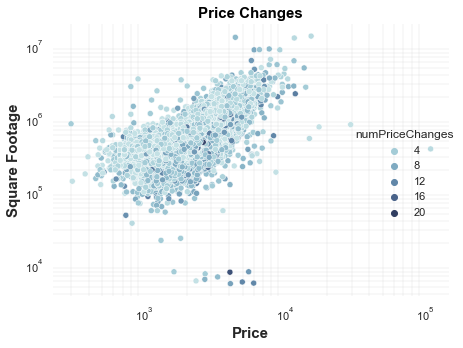

In [21]:
sns.set_theme(style="white")

# Load the example planets dataset

markers = {"numPriceChanges": "s", "numOfBedrooms": "X"}

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=cleanDf,
    x="livingAreaSqFt", y="latestPrice",
    hue="numPriceChanges",
    palette=cmap, sizes=(5, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.set_xlabels("Price") 
g.set_ylabels("Square Footage") 
g.set_titles('Price, SqFt, Bed/Bath')
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.title("Price Changes", fontweight="bold", fontsize=15, color="black", fontname="sans-serif")
plt.xlabel("Price", fontweight="bold", fontsize=15, fontname="sans-serif")
plt.ylabel("Square Footage", fontweight="bold", fontsize=15, fontname="sans-serif")
plt.tight_layout()
plt.savefig(r'Seaborn_scatter_price_change_v2.png', dpi = 100)

ValueError: Could not interpret value `latestPrice` for parameter `x`

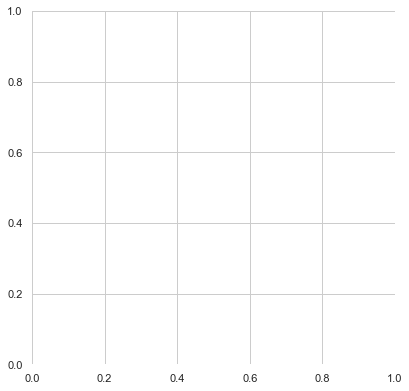

In [15]:
# sns.set_theme(style="whitegrid")


# f, ax = plt.subplots(figsize=(6.5, 6.5))
# sns.despine(f, left=True, bottom=True)
# outlierGoneDf = ['4',  '3',  '5',  '8',  '7',  '2',  '6',  '1',  '0', '10', '20']
# sns.scatterplot(x='latestPrice', y='livingAreaSqFt',
#                 hue="livingAreaSqFt", size="numOfBathrooms",
#                 palette="ch:r=-.2,d=.3_r",
#                 hue_order=outlierGoneDf,
#                 sizes=(1, 8), linewidth=0,
#                 data=outlierGoneDf, ax=ax)